In [25]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.datasets import make_regression

# 선형 회귀 분석의 기초

## 결정론적 모형 (Deterministic Model) 

단순히 독립변수 $x$에 대해 종속변수 $y$와 가장 가까운 $\hat{y}$ 을 찾는 함수 $f(x)$

$$\hat{y} = f(x) \approx y$$

아래는 $f(x)$의 계수, 즉 선형 회귀모형의 모수(parameter)
$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx$$

## Bias Augmentation
수식을 간단하게 만들기 위해서 무조건 1을 추가한다.

$$x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}$$

$$X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}$$


Bias Augmentation을 거치면서,  
$f(x)는$ 가중치 벡터와 입력 벡터의 내적으로 간단히 표현 가능

$$f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a$$

`add_constant` : StatsModels에서의 **bias augmentation** 

In [8]:
X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [10]:
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [11]:
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## Ordinary Least Squares : OLS

잔차 제곱합 **RSS** (Residual Sum of Squares)를 최소화 하는 가중치 벡터를 행렬미분으로 구한다. (가장 기본)

- 구하고자 하는 값
$$ \hat{y} = Xw$$

- `e` 잔차 벡터
$$ e = y-\hat{y} = y-Xw $$

- 잔차제곱합
$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$


- 잔차제곱합의 최소값을 구하기 위한 미분, gradient벡터 (아래의 결과는 선형대수의 법칙 참조)

$$\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w$$


- 잔차가 최소화 되는 최적화 조건
$$\dfrac{d \text{RSS}}{d w} = 0$$

$$X^TXw = X^Ty$$

$$w = (X^TX)^{-1} X^T y$$

- 정규방정식 **(normal equation)**

$$X^Ty - X^TXw = 0$$

$$X^T(y - Xw) = 0$$

$$X^T \cdot e = 0$$

- x가 d차원의 원소로 이루어진 데이터 벡터라고 할 때, 
- 모든 차원에 대해 x는 잔차벡터 e와 수직을 있다.

$$x_d^T e = 0 \;\;\; (d=1, \ldots, D)$$

$$x_d \perp e \;\;\; (d=1, \ldots, D)$$

(부연 설명)

1. $x_1, x_2$ 벡터가 있을 때
2. $w_1, w_2$ 가 벡터의 크기를 결정
3. $w_1 x_1 + w_2 x_2 $를 통한 범위 형성
4. $\hat{y}$는 이 범위 어딘가에 위치
5. 실제 정답 $y$ 값의 벡터가 어딘가에 존재할 때, 
6. $\hat{y}$ 와 $y$의 오차 $e$를 최소로 줄일 수 있는 것은
7. $e$가 $\hat{y}$벡터와 직교할 때, 라고 할 수 있다.

## OLS : Numpy를 이용한 선형회귀분석

In [13]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, 
                              noise=10, coef=True, random_state=1)
X = sm.add_constant(X0) # bias augmentation
y = y.reshape(len(y), 1)

In [14]:
coef

array(80.71051956187792)

$$y = 100 + 80.7105x + e$$

In [15]:
# OLS 해를 직접 찾는다.
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[ 102.02701439],
       [  81.59750943]])

In [16]:
# lstsq 명령 적용
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

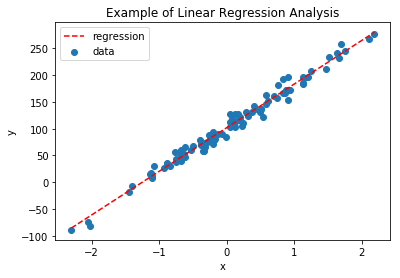

In [22]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r--', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

## OLS : StatsModels 선형회귀분석

In [29]:
from sklearn.datasets import load_boston
boston = load_boston()

In [32]:
# 데이터 값
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

# add_constant 상수항 추가
dfX = sm.add_constant(dfX0)

# 종속변수 명시
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

# OLS 클래스 객체 생성
model_boston2 = sm.OLS(dfy, dfX)

# fit 메서드로 모형 추정
result_boston2 = model_boston2.fit()
print(result_boston2.summary())


# Regression Result 출력

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        03:06:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

- `std err` : 오차의 표준편차 (+-)
- `t` : test statistics
- `P > |t|` : test statistics에 대응하는 p-value
    - 귀무가설 H0--> w0의 계수가 0이다 --> 귀무가설 기각. 즉, w0는 0이 아니다.
- `confidance interval` (95%의 확률로): coef +- stderr^2

아랫단,
- 잔차가 정규성을 띄고 있는지 normality test의 결과를 보여준다.
    - 귀무가설 H0 --> normal을 띈다 --> Omnibus 테스트에서 귀무가설 기각. 

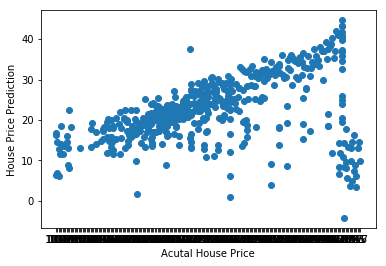

In [37]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"Acutal House Price")
plt.ylabel(u"House Price Prediction")
plt.show()

- `resid` : 잔차 벡터
- `params`: 모수 벡터

In [34]:
result_boston2.resid.head()

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

In [35]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

`plot_regress_exog`

예) X1 (crime rate)와 Y값의 관계를 보여주는 `plot_regress_exog`

`partial regression plot`, `CCPR Plot`
- X1, Y값을 재조정하여
- X1과 Y값의 관계를 좀 더 잘 보여준다.

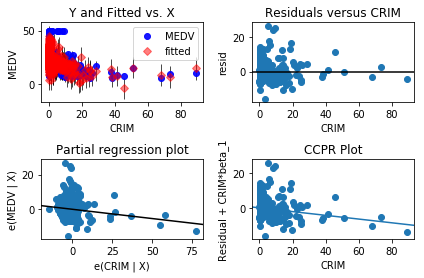

In [36]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()